### Google Colab and GitHub Link
- If you are running this in an IDE and wish to run this on colab here is a link:
- https://colab.research.google.com/drive/1ubblz5FCEhtWhqSUsrH4MnHS5meu-kyq?usp=sharing
- GitHub link:
- https://github.com/brencemoore/AutoClaimAI

## Import Dataset

In [ ]:
!pip install gdown

import gdown
import os

# Zipped file from 'https://github.com/suryaremanan/Damaged-Car-parts-prediction-using-YOLOv8'
file_id = '1vCqO_YGBiwLMgHEyM6W5tQBE7TUjykx1'
output_filename = 'parts-dataset.zip'

# Check if the file already exists
if os.path.exists(output_filename):
    print(f"Found existing file: {output_filename}. Removing it now...")
    os.remove(output_filename)
    print("Existing file removed.")
else:
    print(f"No existing file named {output_filename} found. Proceeding with download.")

gdown.download(id=file_id, output=output_filename, quiet=False)

print("Download complete.")

if os.path.exists('data/'):
    print(f"Found existing folder: data/. Removing it now...")
    !rm -r data/
    print("Existing folder removed.")
else:
    print(f"No existing folder named data/ found. Proceeding with unzip.")

print("Unzipping data")
!unzip -q parts-dataset.zip

!ls -lh

Found existing file: parts-dataset.zip. Removing it now...
Existing file removed.


Downloading...
From (original): https://drive.google.com/uc?id=1vCqO_YGBiwLMgHEyM6W5tQBE7TUjykx1
From (redirected): https://drive.google.com/uc?id=1vCqO_YGBiwLMgHEyM6W5tQBE7TUjykx1&confirm=t&uuid=240f64bf-26cb-4f08-a85c-1d8649a94c13
To: /content/parts-dataset.zip
100%|██████████| 96.3M/96.3M [00:00<00:00, 204MB/s]


Download complete.
Found existing folder: data/. Removing it now...
Existing folder removed.
Unzipping data
total 98M
-rw-r--r-- 1 root root  314 Nov 23 09:15 car_classify_metrics.csv
-rw-r--r-- 1 root root 6.0M Nov 23 08:41 car-part.pt
drwxrwxrwx 5 root root 4.0K Nov 23 05:37 data
-rw-r--r-- 1 root root  92M Nov 23 05:47 parts-dataset.zip
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data


In [ ]:
# Path to images: data/images/train/
# Path to labels: data/labels/train/

import pandas as pd
import numpy as np
import os

# Same classes as code in pipeline (detect_damage.py: classify_part())
classes = np.array(['Door', 'Window', 'Headlight', 'Mirror', 'Body/Unknown', 'Hood', 'Bumper', 'Wind Shield'])

image_list = []
label_list = []

image_dir = './data/images/train/'

# Appends every file name to a dataframe
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_list.append(filename)

parts_df = pd.DataFrame(np.array(image_list), columns=['filename'])

label_dir = './data/labels/train/'

# Adds a column to each file to show what part is damaged based off of class indexs
# Iterate through each row of your DataFrame
for index, row in parts_df.iterrows():

    image_filename = row['filename']

    base_name, _ = os.path.splitext(image_filename)

    txt_filename = base_name + '.txt'

    txt_file_path = os.path.join(label_dir, txt_filename)

    if os.path.exists(txt_file_path):
        try:
            with open(txt_file_path, 'r') as f:
                content = f.read().split(' ')[0]
                label_list.append(int(content))
        except Exception as e:
            print(f"Error reading {txt_filename}: {e}")
            label_list.append(None)
    else:
        print(f"Warning: No matching label file found for {image_filename}")
        label_list.append(None)


# Creates column for damaged part as a string value
parts_df['class_index'] = np.array(label_list)
parts_df['part_damaged'] = parts_df['class_index'].apply(lambda x: classes[x].upper())

parts_df.head(10)

,filename,class_index,part_damaged
0,damaged-car-doors-dismantled-parts-blue-deform...,0,DOOR
1,image64f.jpeg,0,DOOR
2,image27.jpeg,5,HOOD
3,images1613a.jpg,2,HEADLIGHT
4,image144f.jpeg,4,BODY/UNKNOWN
5,images1064f.jpg,1,WINDOW
6,coachwork-damage-door-of-a-grey-4x4-vehicle-in...,4,BODY/UNKNOWN
7,2784389583a.jpg,6,BUMPER
8,images2354f.jpg,0,DOOR
9,image24.jpeg,5,HOOD


### Test if dataset is aligned

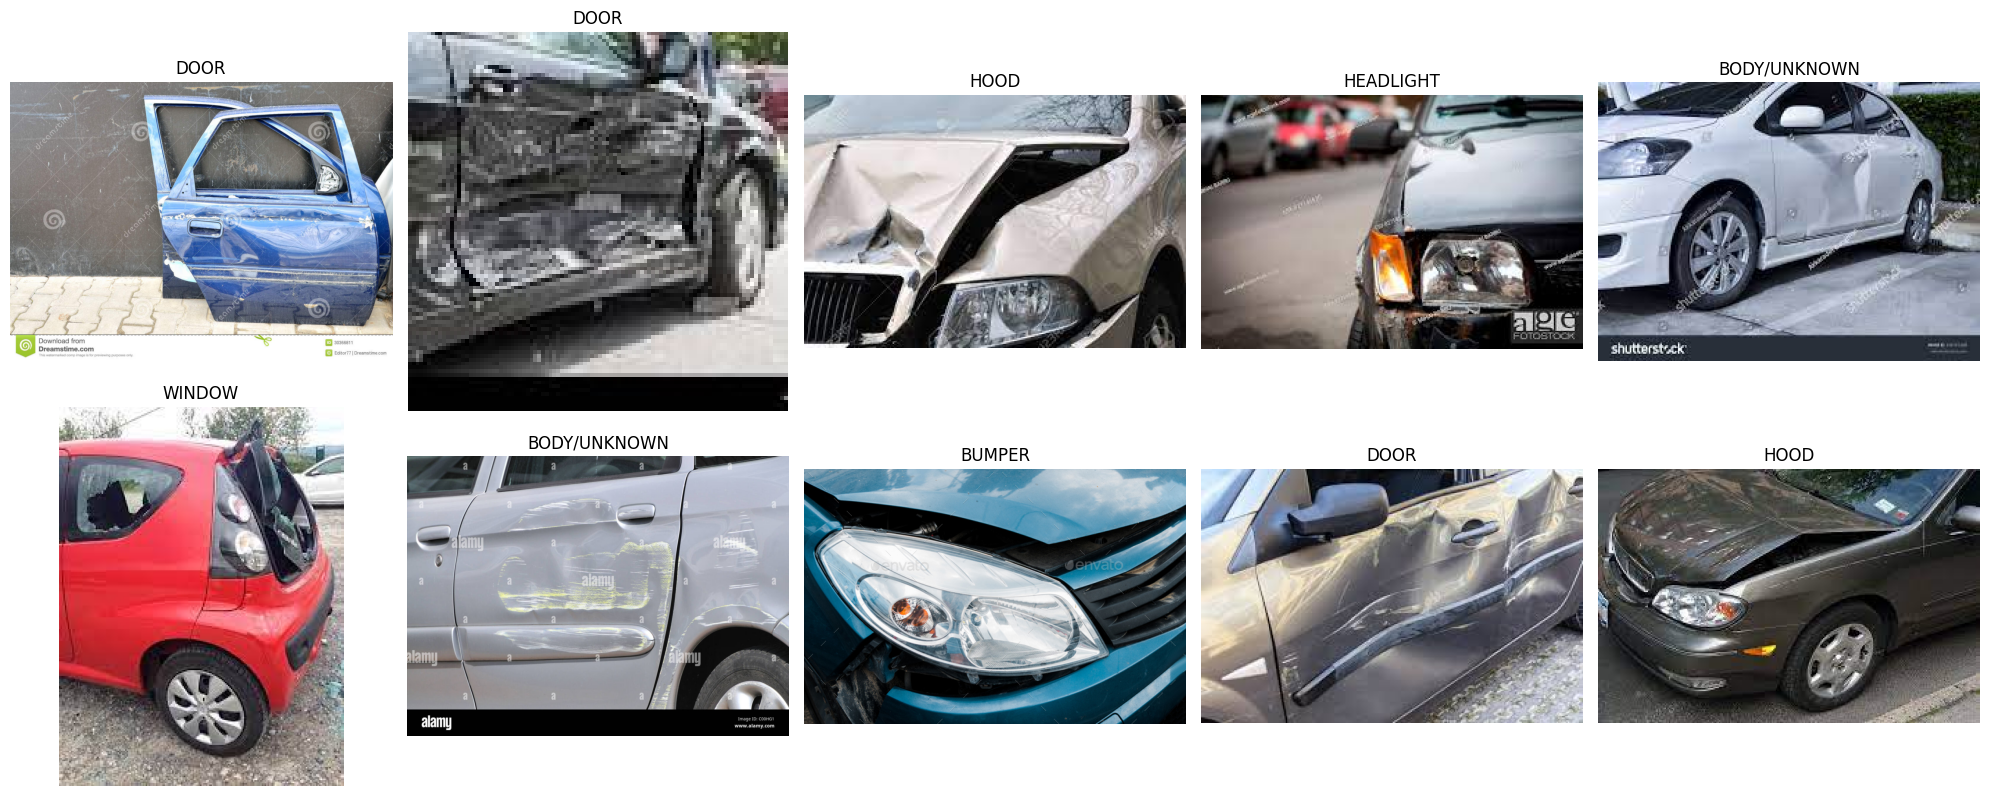

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_dir = './data/images/train/'

first_10_filenames = parts_df['filename'].head(10).tolist()

plt.figure(figsize=(20, 8))

# Prints first 10 images with part that is damaged as the title
for i, filename in enumerate(first_10_filenames):
    # Create the full path to the image
    image_path = os.path.join(data_dir, filename)

    try:
        img = mpimg.imread(image_path)

        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(parts_df['part_damaged'][i])
        plt.axis('off')

    except FileNotFoundError:
        print(f"Error: Could not find file {image_path}")
    except Exception as e:
        print(f"Error loading {filename}: {e}")

plt.tight_layout()
plt.show()

## Import Model Used for Part Classification

In [ ]:
# Pre-trained weights file from 'https://github.com/suryaremanan/Damaged-Car-parts-prediction-using-YOLOv8' (best.pt)
file_id = '194ChuXSdZWbMq1dqCBnzJ5oktAusZzwc'
output_filename = 'car-part.pt'

# Check if the file already exists
if os.path.exists(output_filename):
    print(f"Found existing file: {output_filename}. Removing it now...")
    os.remove(output_filename)
    print("Existing file removed.")
else:
    print(f"No existing file named {output_filename} found. Proceeding with download.")

gdown.download(id=file_id, output=output_filename, quiet=False)

print("Download complete.")

!ls -lh

Found existing file: car-part.pt. Removing it now...
Existing file removed.


Downloading...
From: https://drive.google.com/uc?id=194ChuXSdZWbMq1dqCBnzJ5oktAusZzwc
To: /content/car-part.pt
100%|██████████| 6.22M/6.22M [00:00<00:00, 23.4MB/s]

Download complete.
total 98M
-rw-r--r-- 1 root root  314 Nov 23 09:15 car_classify_metrics.csv
-rw-r--r-- 1 root root 6.0M Nov 23 08:41 car-part.pt
drwxrwxrwx 5 root root 4.0K Nov 23 05:37 data
-rw-r--r-- 1 root root  92M Nov 23 05:47 parts-dataset.zip
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data


In [ ]:
!pip install ultralytics

In [ ]:
# Classifies the damaged part of the car
def classify_part(image_path):
    from ultralytics import YOLO
    from pathlib import Path

    # Edited to work in colab file structure
    model_path = "car-part.pt"
    model = YOLO(model_path)
    results = model(image_path)

    # Extract detected class names
    detected_parts = results[0].names
    boxes = results[0].boxes

    # Return 'unknown' if part cannot be determined
    if boxes is None or boxes.cls is None or len(boxes.cls) == 0:
        return "Unknown"

    # If there are detections, get the most confident one
    classes = boxes.cls.cpu().numpy()
    confidences = boxes.conf.cpu().numpy()
    best_idx = confidences.argmax()
    best_class = int(classes[best_idx])

    parts = ['Door', 'Window', 'Headlight', 'Mirror', 'Body/Unknown', 'Hood', 'Bumper', 'Wind Shield']

    return parts[best_class].upper()

In [ ]:
# Test if model works with 1 image
part = classify_part(f'./data/images/train/{parts_df['filename'][0]}')
print(f'\nPrediction: {part}')
print(f'Actual: {parts_df['part_damaged'][0]}')


image 1/1 /content/data/images/train/damaged-car-doors-dismantled-parts-blue-deformed-door-wall-background-303668114f.jpg: 480x640 1 damaged door, 357.5ms
Speed: 7.4ms preprocess, 357.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

Prediction: DOOR
Actual: DOOR


## Evaluate Model
- Because of the size of the dataset, there is not need to create a sampled dataset.


In [ ]:
# List for tracking predictions
pred_part = []
count = 1

# Runs model on entire dataset
for row in parts_df['filename']:
    path = f'./data/images/train/{row}'
    part = classify_part(path)

    pred_part.append(part)
    print(count)
    count += 1

print(pred_part)


image 1/1 /content/data/images/train/damaged-car-doors-dismantled-parts-blue-deformed-door-wall-background-303668114f.jpg: 480x640 1 damaged door, 271.9ms
Speed: 5.1ms preprocess, 271.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
1

image 1/1 /content/data/images/train/image64f.jpeg: 640x640 1 damaged door, 323.3ms
Speed: 5.8ms preprocess, 323.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
2

image 1/1 /content/data/images/train/image27.jpeg: 448x640 1 damaged headlight, 1 damaged hood, 266.4ms
Speed: 3.2ms preprocess, 266.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
3

image 1/1 /content/data/images/train/images1613a.jpg: 448x640 1 damaged headlight, 220.6ms
Speed: 5.7ms preprocess, 220.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
4

image 1/1 /content/data/images/train/image144f.jpeg: 480x640 1 dent, 262.6ms
Speed: 4.0ms preprocess, 262.6ms inference, 2.3ms postprocess per image at shape (1,

In [ ]:
result_df = parts_df
result_df['pred_part'] = pred_part
result_df

,filename,class_index,part_damaged,pred_part
0,damaged-car-doors-dismantled-parts-blue-deform...,0,DOOR,DOOR
1,image64f.jpeg,0,DOOR,DOOR
2,image27.jpeg,5,HOOD,HOOD
3,images1613a.jpg,2,HEADLIGHT,HEADLIGHT
4,image144f.jpeg,4,BODY/UNKNOWN,BODY/UNKNOWN
...,...,...,...,...
480,-side-view-closeup-broken-car-headlight-accide...,5,HOOD,HOOD
481,images161.jpg,5,HOOD,HEADLIGHT
482,images3784f.jpg,1,WINDOW,WINDOW
483,360_F_351022383_JUc9Gs6zs0dBzxNihLmpJe9qSmLzWE...,7,WIND SHIELD,WIND SHIELD


## Create Confusion Matrix

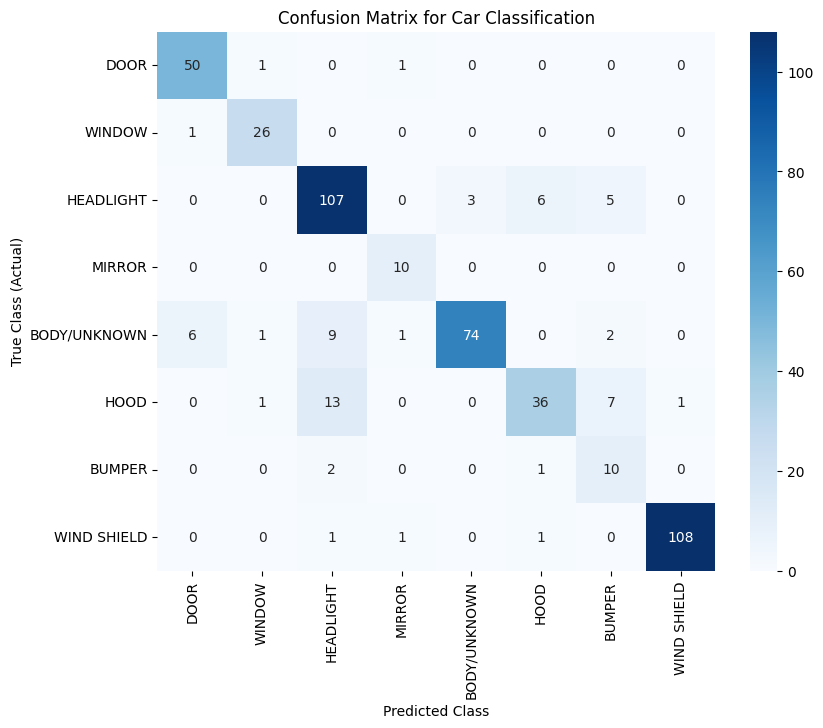

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

classes = [string.upper() for string in classes]

cm = confusion_matrix(
    y_true = np.array(result_df['part_damaged']),
    y_pred = np.array(result_df['pred_part']),
    labels = classes
)

cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# This confusion matrix is still used for main evaluation metrics
plt.figure(figsize=(9, 7))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True
)

plt.title('Confusion Matrix for Car Classification')
plt.ylabel('True Class (Actual)')
plt.xlabel('Predicted Class')
plt.show()

In [ ]:
# Report from scikit-learn library
# Calculates: precision, recall, f1; and the from those: micro average, macro average, and weighted average
report = classification_report(
    y_true = result_df['part_damaged'],
    y_pred = result_df['pred_part'],
    labels = classes,
    zero_division = 0,
    output_dict=True
)
print(report)

report_df = pd.DataFrame.from_dict(report).transpose()
report_df = report_df.round(3)
report_df

{'DOOR': {'precision': 0.8771929824561403, 'recall': 0.9615384615384616, 'f1-score': 0.9174311926605505, 'support': 52.0}, 'WINDOW': {'precision': 0.896551724137931, 'recall': 0.9629629629629629, 'f1-score': 0.9285714285714286, 'support': 27.0}, 'HEADLIGHT': {'precision': 0.8106060606060606, 'recall': 0.8842975206611571, 'f1-score': 0.8458498023715415, 'support': 121.0}, 'MIRROR': {'precision': 0.7692307692307693, 'recall': 1.0, 'f1-score': 0.8695652173913043, 'support': 10.0}, 'BODY/UNKNOWN': {'precision': 0.961038961038961, 'recall': 0.7956989247311828, 'f1-score': 0.8705882352941177, 'support': 93.0}, 'HOOD': {'precision': 0.8181818181818182, 'recall': 0.6206896551724138, 'f1-score': 0.7058823529411765, 'support': 58.0}, 'BUMPER': {'precision': 0.4166666666666667, 'recall': 0.7692307692307693, 'f1-score': 0.5405405405405406, 'support': 13.0}, 'WIND SHIELD': {'precision': 0.9908256880733946, 'recall': 0.972972972972973, 'f1-score': 0.9818181818181818, 'support': 111.0}, 'accuracy': 0

,precision,recall,f1-score,support
DOOR,0.877,0.962,0.917,52.000
WINDOW,0.897,0.963,0.929,27.000
HEADLIGHT,0.811,0.884,0.846,121.000
MIRROR,0.769,1.000,0.870,10.000
BODY/UNKNOWN,0.961,0.796,0.871,93.000
HOOD,0.818,0.621,0.706,58.000
BUMPER,0.417,0.769,0.541,13.000
WIND SHIELD,0.991,0.973,0.982,111.000
accuracy,0.868,0.868,0.868,0.868
macro avg,0.818,0.871,0.833,485.000


### Download Files
- Downloads the final metrics report as a .csv file for other use


In [ ]:
# Downloads report as .csv file
from google.colab import files

OUTPUT_FILE = 'car_part_metrics.csv'

print("Exportint Metrics to .csv file:")
report_df.to_csv(OUTPUT_FILE, index=True)

print(f'Downloading: {OUTPUT_FILE}')
files.download(OUTPUT_FILE)

Exportint Metrics to .csv file:
Downloading: car_classify_metrics.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>